In [44]:
import pandas as pd #package for data analysis
import statsmodels.api as statsmodels #package for stats modelling
import seaborn as sns #  plotting package
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# data loaded into pandas dataframe
data = pd.read_csv("responses.csv") # requires csv file loaded into directory

# survey questions not answered are filled in with the mean value for that column
syndata = data.fillna(data.mean())

# questions with non-numerical answers are excluded
syndata = syndata._get_numeric_data()
syndata.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0


In [31]:
# Descriptive stats code used in the previous assignment. 

import numpy as np # library used to calculate some of the stats
def my_count(lst,val): # define function that takes a list and a variable to count in the list
                        # as inputs.
    global result       #the variable result will be changed outside the function as well
    result = 0 # variable that counts occurences
    for item in lst: # for each item in the list
        if item == val: # if the item is equal to the value we want to count:
            result += 1 # add 1 to result
    return result 
def my_mode(lst): # function to find mode(s) of a list, takes list as input
    result1 = 0 # #determines the occurences of current mode
    modes = [] # list with all the modes
    for item in lst: # loops through elements in the list 
        my_count(lst, item) # uses the previously defined function 
                            # to count the occurences of the value
        if result > result1: # if this value has the most occurences in the list...
            result1 = result # updates the number of occurences of current mode
            mode = [item] # updates list of modes to contain only that value
        if result == result1: # if the value has an equl number of occurences as the previous mode
            if item not in mode: # and the value is not yet in the modes list
                mode.append(item) # append it there
    return mode #returns list of modes
def my_range(lst): #function to determine range
    smallest = lst[0] # determines the smallest value of the list
    biggest = lst[0] # determines the biggest value of the list
    for i in lst: # loops through each item in the list
        if i < smallest: # if the item is the smallest so far
            smallest = i # update the smallest variable
        if i > biggest: # if the item is the biggest so far
            biggest = i # update the biggest variable
    return biggest - smallest, [smallest, biggest] #returns the difference between the smallest and the biggest value
def desc_stats(lst):
    print("count: " + str(len(lst))) # displays lentgh of the list
    print("mean: " + str(np.mean(lst))) # the function sums all the values in the list var and 
                                    # divides the sum by the length of the list
    print("median: " + str(np.median(lst))) # the function returns the value in the middle of the sorted list 
                                    # or the mean of the two middle variable is the length is an even number
    print("mode: " + str(my_mode(lst)))
    print("range: " + str(my_range(lst)))
    print("standard deviation: " + str(np.std(lst))) # the function takes the mean of the list, 
                                                        #calculates the difference of each 
                                                        # value in the list from the mean and squares it. 
                                            #Then, it sums all the squared differences and divides it by the length
                                         # of the list. The function returns the square root of this value.

count: 1010
mean: 2.595639246778989
median: 2.0
mode: [2.0]
range: (4.0, [1.0, 5.0])
standard deviation: 1.2931735515167342


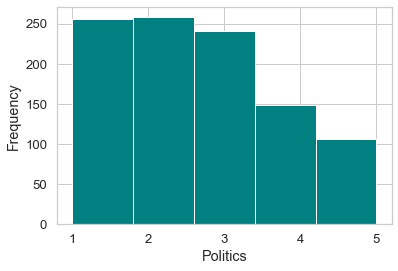

In [39]:
#print descriptive stats and distribution
fig, ax = plt.subplots()
desc_stats(list(syndata["Politics"]))
plt.hist(list(syndata["Politics"]), bins = 5, color = "teal")
ax.set_xlabel("Politics")
ax.set_ylabel("Frequency")
plt.savefig("Hist", dpi = 300)

In [23]:
# function to verify colinearity. 
def colinearity(predictors, var):
    col = False
    for i in predictors[:]:
        slope, intercept, r_value, p_value, std_err = stats.linregress(syndata[i],syndata[var])
        # Variance inflation factor (VIF) determines the colinearity between two variables
        VIF = 1/(1- r_value**2)
        # if VIF is bigger than 1.5, the functions returns True
        if VIF > 1.5:
            col = True
    return col
colinearity(["Daily events"], "History")


False

In [108]:
# This funtion will find the model with the biggest R squared using the forward selection method.
# It accepts as arguments: the dependent variable, the maximum number of predictor variables, 
# and a keyword argument that specifies if it should check for colinearity.

def Best_Model(dependent, number, col = True):
    print(dependent)
    columns = list(syndata)
    columns.remove(dependent) # avoid checking correlation with itself
    global predictor
    predictor = [] # list will contain the predictor variables
    predictortemp = [] 
    adjRsquared = False #variable to be maximized
    y = syndata[dependent] 
    
    # each loop will find the variable the increases adj r**2 the most
    for n in range(number): 
        if len(predictortemp)>0: # makes predictortemp be the same as predictor
            predictortemp[-1] = predictor[-1]
        predictor.append(0) # appends a null item
        predictortemp.append(0)
        for i in columns: # for each of the variables in the dataset
            predictortemp[-1]= i #add it to predictortemp
            X = syndata[predictortemp] 
            X = statsmodels.add_constant(X)
            model = statsmodels.OLS(y, X).fit() #creates a model with that variable
            if model.rsquared_adj > adjRsquared: # check if adj r**2 increased
                if colinearity(predictor[:-1], i) == False or col == False: # check for colinearity colinearity
                    adjRsquared = model.rsquared_adj #updates adj r**2
                    predictor[-1] = i #adds the variable to predictor list
                    var = i # last variable that passed all conditions
        
        #if no variable increased adj r**2, break loop
        if len(predictor) > 1 and var == predictor[-2]: 
            predictor.remove(0)
            break
            
        #remove variable to avoid checking it again
        columns.remove(var)
    
    # Model with complete list of predictors
    bestX = syndata[predictor]
    bestX = statsmodels.add_constant(bestX)
    global bestmodel
    bestmodel = statsmodels.OLS(y, bestX).fit()
    
    # residual plot (from classes):
    plt.figure()
    residualplot = sns.residplot(x=bestmodel.predict(), y=bestmodel.resid, color='lightseagreen', scatter_kws={"alpha": 0.3})
    residualplot.set(xlabel='Fitted values', ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    plt.savefig("All residuals for " + dependent, dpi = 300)
    
    # QQ plot (from classes):
    qqplot = statsmodels.qqplot(model.resid,fit=True,line='45', color = "royalblue", alpha = 0.3)
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    plt.savefig("QQ for " + dependent, dpi = 300)

    #Correlation matrix plot
    matrix = pd.DataFrame(syndata[predictor])
    matrix[dependent] = syndata[dependent]
    matrix.corr()
    plt.matshow(matrix.corr())
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)
    plt.colorbar()
    plt.savefig("Correlation Matrix", dpi = 300)
    plt.show()
    
    # Regression plots (from classes)
    for i in predictor:
        print("The pearson's r value comparing", i , "to", dependent , "is:")
        print(round(syndata[i].corr(syndata[dependent]),3))
        print("")
        plt.figure()
        sns.regplot(x=i, y=dependent, data=syndata, marker="+",fit_reg=True,color='lawngreen', x_jitter=.25, y_jitter=.25 )
        plt.savefig("Regression for " + i, dpi = 300)
        
        plt.figure()
        X = syndata[i]
        X = statsmodels.add_constant(X)
        model = statsmodels.OLS(y, X).fit()
        residualplot = sns.residplot(x=model.predict(), y=bestmodel.resid, color='green', scatter_kws={"s": 10, "alpha": 0.3})
        residualplot.set(xlabel='Fitted values for '+ i, ylabel='Residuals')
        residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
        plt.savefig("Residuals for " + i, dpi = 300)
        
        ax, fig = plt.subplots()
        histogram = plt.hist(syndata[i], bins = 5)
        ax.set_xlabel = i
        ax.set_ylabel = "Frequency"
        plt.savefig("Histogram for " + i, dpi = 300)
        plt.show()
        
    return bestmodel.summary()
    
    



Politics


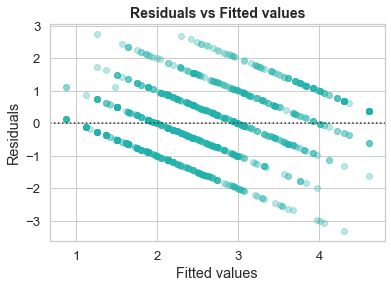

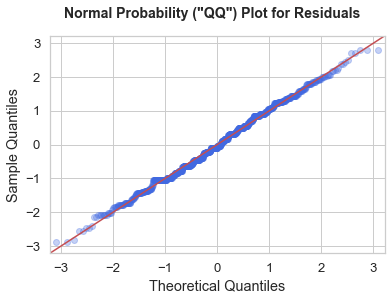

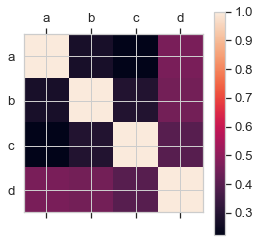

The pearson's r value comparing Daily events to Politics is:
0.464



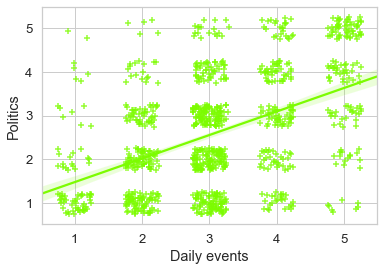

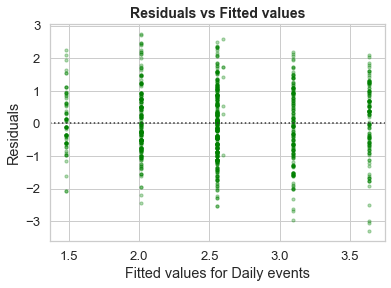

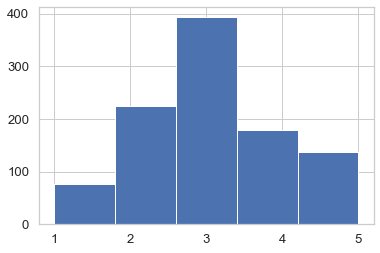

The pearson's r value comparing Law to Politics is:
0.451



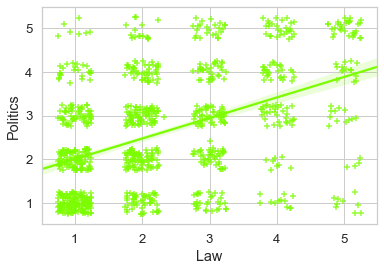

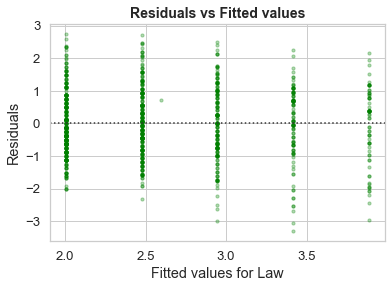

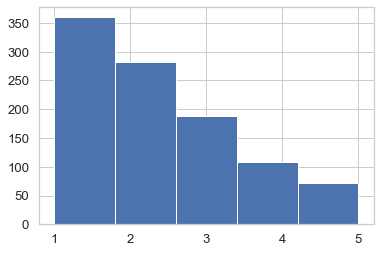

The pearson's r value comparing History to Politics is:
0.4



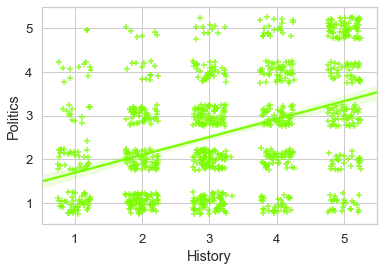

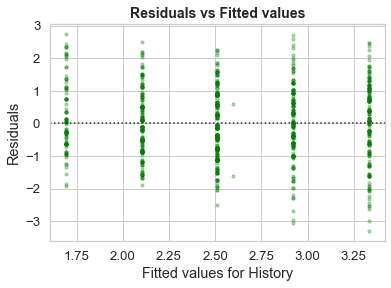

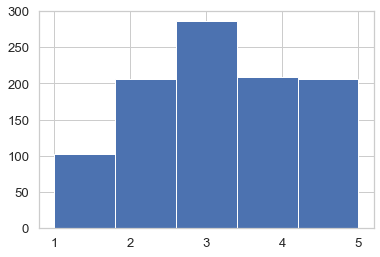

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Politics   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     206.4
Date:                Sun, 02 Feb 2020   Prob (F-statistic):          2.49e-104
Time:                        12:20:19   Log-Likelihood:                -1450.5
No. Observations:                1010   AIC:                             2909.
Df Residuals:                    1006   BIC:                             2929.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0608      0.115     -0.528      0.598      -0.287       0.165
Daily events     0.3853      0.030     12.722      0.000       0.326       0.445
Law              0.3021      0.028     10.894      0.000       0.248       0.356
History          0.2463      0.027      9.144      0.000       0.193       0.299
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.177
Skew:                           0.014   Prob(JB):                        0.555
Kurtosis:                       2.835   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
Best_Model("Politics", 3, col = True)

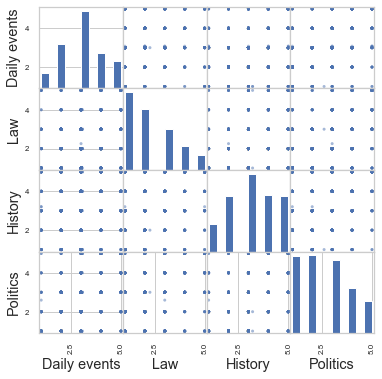

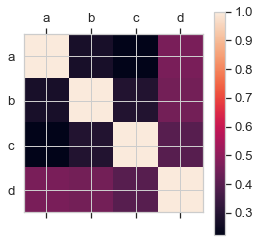

In [90]:
from pandas.plotting import scatter_matrix
matrix = pd.DataFrame(syndata[predictor])
matrix["Politics"] = syndata["Politics"]
matrix.corr()
scatter_matrix(matrix, figsize=(6, 6))
plt.show()
plt.matshow(matrix.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()


In [91]:
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'
df

,a,b,c,d
0,19,13.549277,86.637929,24
1,15,5.432620,92.345217,27
2,33,32.103483,68.591932,25
3,6,3.554687,103.037925,24
4,28,16.656903,69.345512,23
...,...,...,...,...
995,6,9.511817,81.181919,13
996,46,38.853329,46.082913,49
997,38,37.920948,62.809493,10
998,17,9.243042,84.248743,17
